In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_excel('Datasets/angles_data_WPushUp.xlsx')
df2 = pd.read_excel('Datasets/angles_data_PushUp2.xlsx')

In [3]:
df

,Frame_Number,Angle_At_Right_Elbow,Angle_At_Left_Elbow,Angle_At_Right_Shoulder,Angle_At_Left_Shoulder,Angle_At_Right_Knee,Angle_At_Left_Knee,Angle_At_Right_Hip,Angle_At_Left_Hip,Angle_At_Neck
0,1,112.228097,105.946917,300.824159,299.432987,184.441116,187.085919,174.944262,174.169365,350.952210
1,2,111.508559,106.888412,301.186045,298.390550,186.138609,188.585697,176.493238,174.894198,350.877502
2,3,122.694951,105.806382,310.974083,307.115284,186.205691,190.585809,170.316754,174.080939,336.495308
3,4,115.000636,112.119797,319.233650,320.223157,180.672940,188.610178,174.979710,174.394882,344.299989
4,5,106.251383,101.149346,333.678503,335.817371,122.452475,238.902113,34.093071,320.392733,347.233787
...,...,...,...,...,...,...,...,...,...,...
222,246,110.419488,152.510722,339.332533,317.639719,315.494752,244.399526,211.424646,256.885499,335.198434
223,248,139.734922,92.450494,315.014362,308.222139,321.946559,302.768595,191.754167,269.893425,296.091282
224,249,116.855602,109.071423,329.427421,309.073835,313.681061,311.162952,200.361645,275.133564,316.530203
225,250,109.789651,144.354930,341.292500,300.019344,314.007536,216.727673,213.338021,278.606043,310.640865


In [4]:
df2

,Frame_Number,Angle_At_Right_Elbow,Angle_At_Left_Elbow,Angle_At_Right_Shoulder,Angle_At_Left_Shoulder,Angle_At_Right_Knee,Angle_At_Left_Knee,Angle_At_Right_Hip,Angle_At_Left_Hip,Angle_At_Neck
0,11,164.900213,174.850113,21.871791,321.401825,132.670667,152.282742,178.633216,164.828972,285.560476
1,12,171.681053,162.909836,317.888063,344.212528,219.130279,154.458021,227.926444,165.775858,50.833785
2,13,173.464632,169.991181,312.484949,337.285886,150.625724,165.389093,199.784260,174.229535,58.090823
3,14,174.042065,167.750144,312.757445,336.512367,147.902248,162.665008,192.406042,177.227433,48.803733
4,15,173.397460,165.968670,313.937769,334.964222,152.489376,161.959365,187.981711,182.183693,49.346327
...,...,...,...,...,...,...,...,...,...,...
382,393,159.641628,99.994627,302.852442,358.562340,155.941821,153.386439,187.682500,193.395184,321.426590
383,394,162.616964,106.175721,300.762503,354.914694,152.765433,153.124623,188.921274,193.979480,332.015422
384,395,165.137839,111.189898,299.991363,353.236223,154.289443,155.720595,186.431442,191.325187,351.098075
385,396,167.743894,116.517977,298.769741,351.848019,153.552061,156.486992,186.279836,188.811858,6.258279


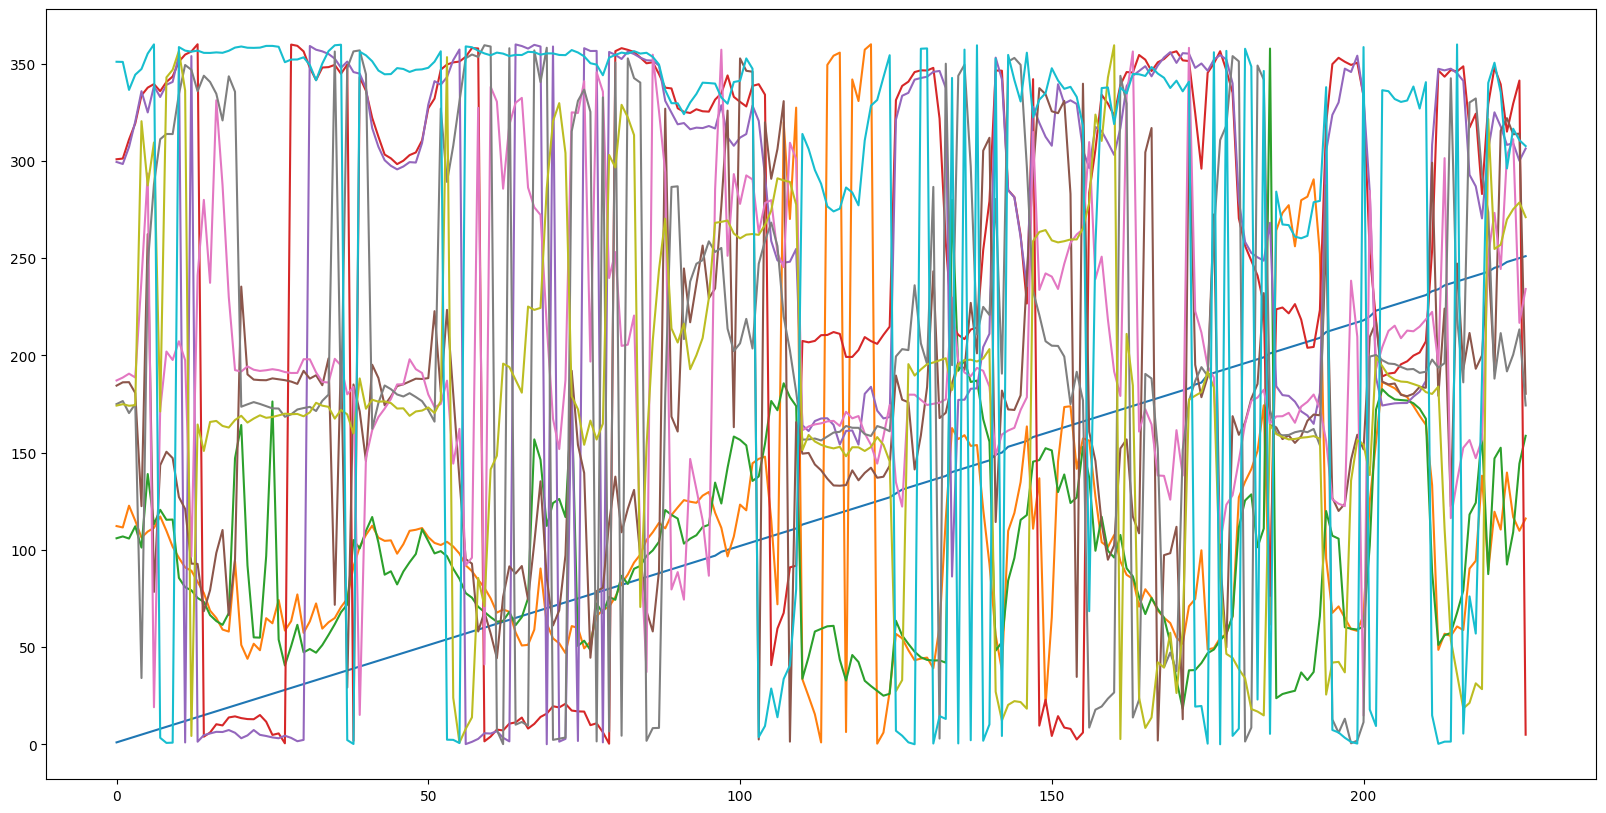

In [5]:
plt.figure(figsize=(20,10))
plt.plot(df)

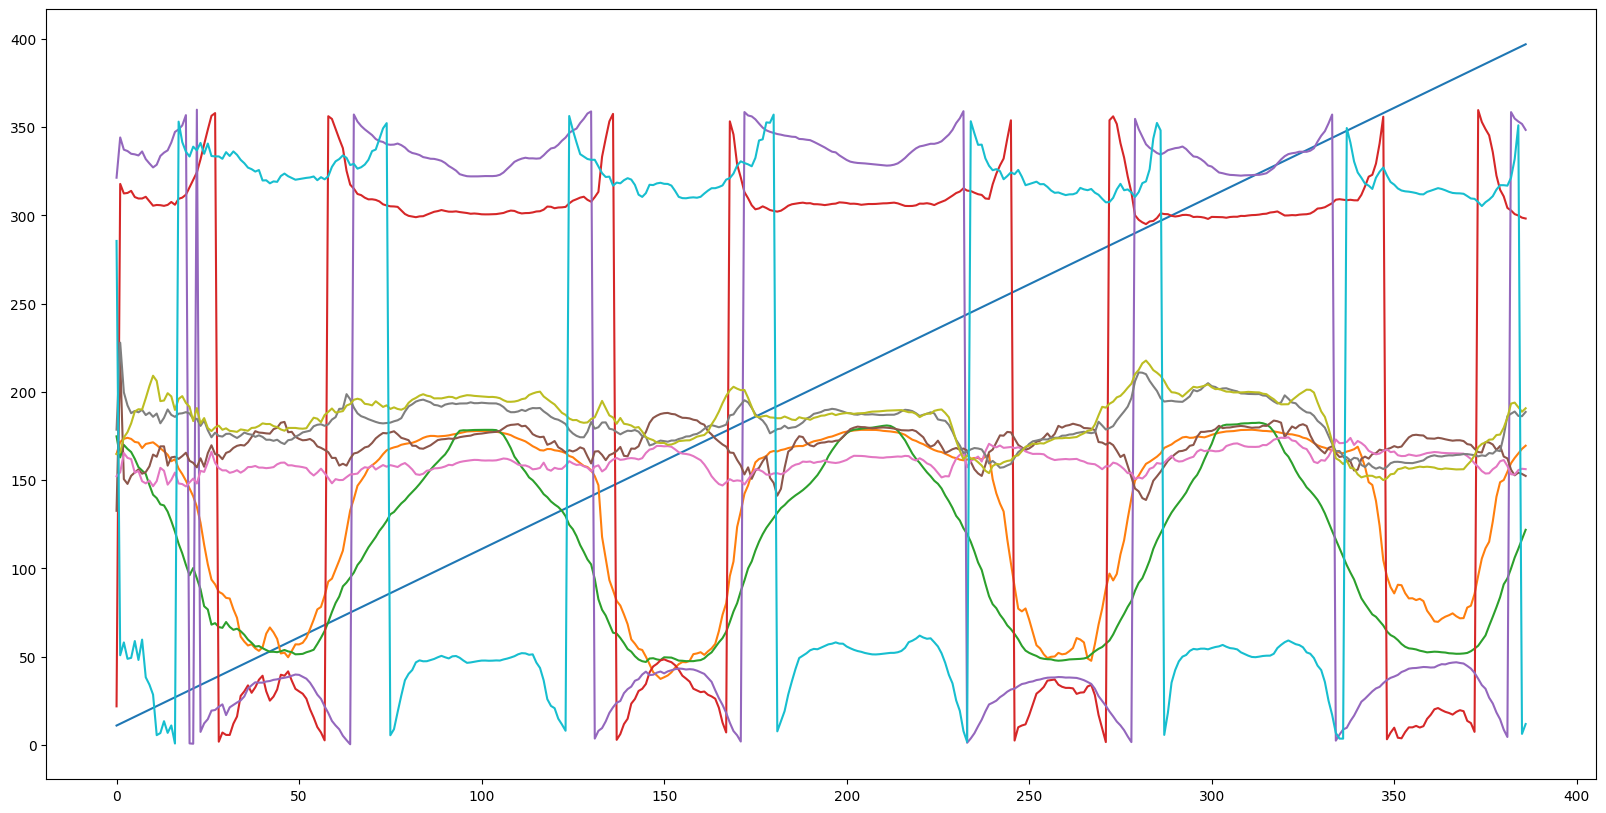

In [6]:
plt.figure(figsize=(20, 10))
plt.plot(df2)

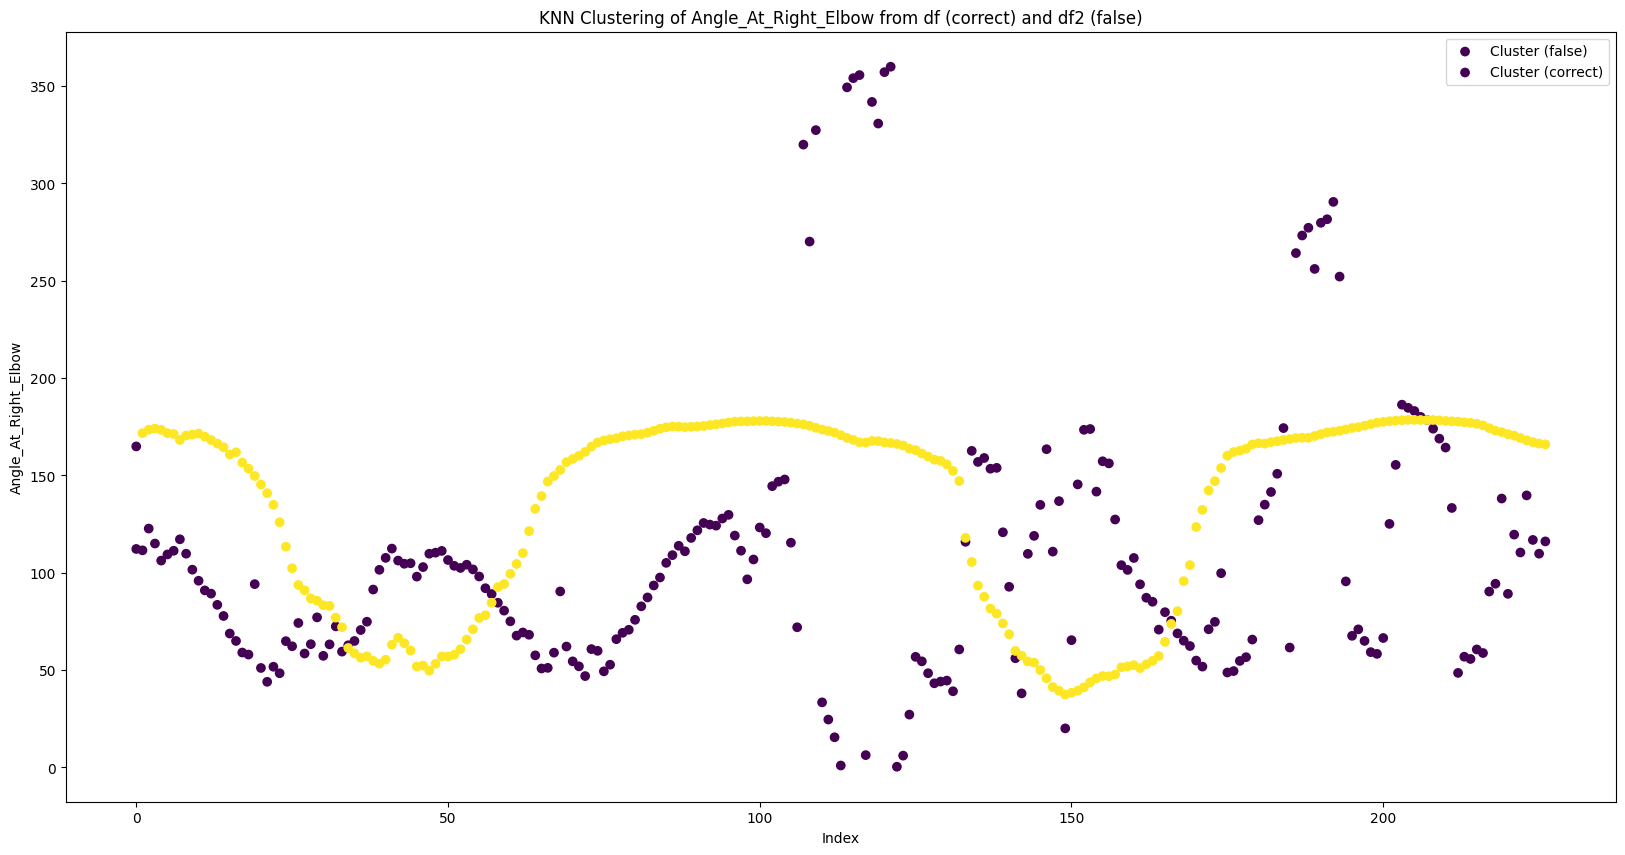

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Assuming df and df2 have the same column names
common_columns = df.columns.intersection(df2.columns)

# Extract common indices
common_indices = df.index.intersection(df2.index)

# Extract values for common columns and common indices
common_values_df = df.loc[common_indices, common_columns].values
common_values_df2 = df2.loc[common_indices, common_columns].values

# Create labels for the clusters (assuming 0 for false, 1 for correct)
labels = np.concatenate([np.zeros(len(common_indices)), np.ones(len(common_indices))])

# Concatenate the values from both DataFrames along axis 0
combined_data = np.vstack([common_values_df, common_values_df2])

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(combined_data, labels)

# Predict cluster labels for the combined data
predicted_labels = knn.predict(combined_data)

# Plot the clustered points
plt.figure(figsize=(20, 10))

# Scatter plot for df
plt.scatter(common_indices, df['Angle_At_Right_Elbow'][common_indices], c=predicted_labels[:len(common_indices)], label='Cluster (correct)')

# Scatter plot for df2
plt.scatter(common_indices, df2['Angle_At_Right_Elbow'][common_indices], c=predicted_labels[len(common_indices):], label='Cluster (false)')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Angle_At_Right_Elbow')
plt.title('KNN Clustering of Angle_At_Right_Elbow from df (false) and df2 (correct)')

# Display legend
plt.legend()

# Show the plot
plt.show()


Accuracy: 91.50%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.87       205
           1       0.89      0.99      0.94       348

    accuracy                           0.92       553
   macro avg       0.93      0.89      0.90       553
weighted avg       0.92      0.92      0.91       553


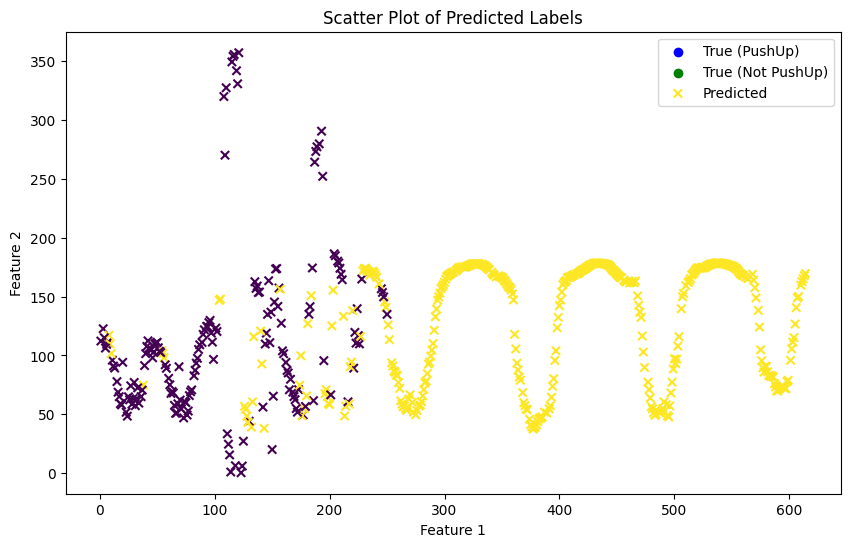

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = 'Datasets/label.xlsx'
df = pd.read_excel(file_path)

# Assuming 'Label' is the column indicating whether it's a "PushUp" or not
X = df.drop('Label', axis=1)  # Features
y = df['Label']  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the scatter plot
plt.figure(figsize=(10, 6))

# Plot true labels (PushUp)
plt.scatter(X_test[y_test == 'PushUp'].iloc[:, 0], X_test[y_test == 'PushUp'].iloc[:, 1], c='blue', label='True (PushUp)')

# Plot true labels (Not PushUp)
plt.scatter(X_test[y_test == 'Not PushUp'].iloc[:, 0], X_test[y_test == 'Not PushUp'].iloc[:, 1], c='green', label='True (Not PushUp)')

# Plot predicted labels
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, marker='x', cmap='viridis', label='Predicted')

# Adding labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Predicted Labels')
plt.legend()

# Show the plot
plt.show()


Unique Predicted Labels: [0 1]


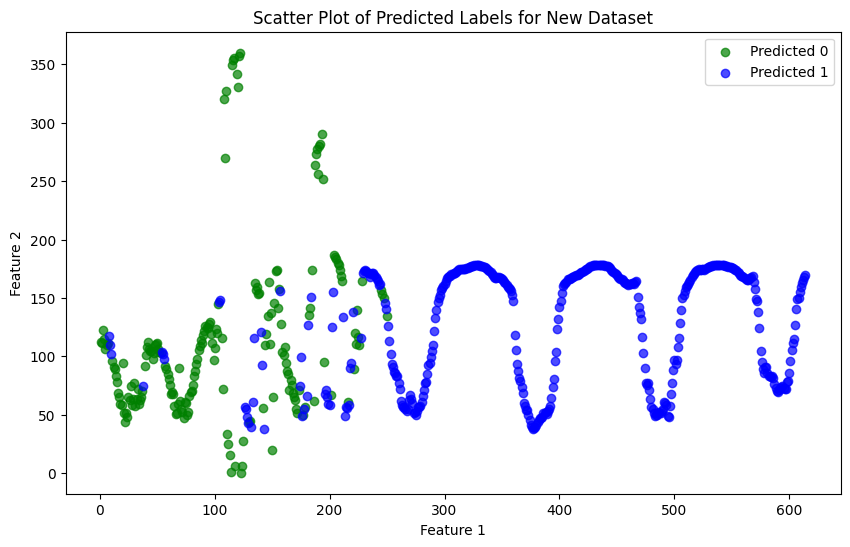

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load the new dataset with unlabeled data
file_path_new = 'Datasets/label.xlsx'
df_new = pd.read_excel(file_path_new)

# Assuming 'Label' is the column indicating whether it's a "PushUp" or not in the original labeled dataset
X_new = df_new.drop('Label', axis=1)   # Features

# Use the trained KNN model to predict labels for the new dataset
y_pred_new = knn.predict(X_new)

# Check unique values in predicted labels
unique_labels = pd.Series(y_pred_new).unique()
print("Unique Predicted Labels:", unique_labels)

# Plot the scatter plot for the new dataset
plt.figure(figsize=(10, 6))

# Plot predicted labels for the new dataset with different colors for each class
for label in unique_labels:
    indices = (y_pred_new == label)
    color = 'blue' if label == 1 else 'green'  # Assign different colors for 0 and 1
    plt.scatter(X_new.iloc[indices, 0], X_new.iloc[indices, 1], label=f'Predicted {label}', alpha=0.7, color=color)

# Adding labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Predicted Labels for New Dataset')
plt.legend()

# Show the plot
plt.show()